# 1. 합성곱 신경망의 구성 요소

#### 합성곱 - 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치 곱한다.

#### 10개의 입력을 가진 합성곱의 뉴런은 8개의 출력을 만든다.(가중치가 3개일 경우)

#### 필터 - 뉴런이 입력위를 이동하면서 출력을 만들기 때문에 뉴런을 필터라 한다.

## 2. 케라스의 합성곱 층

#### 케라스의 합성곱은 keras.layers 패키지아래 Conv2D 클래스로 제공함.

In [1]:
from  tensorflow import keras
#10 - 필터의 갯수, kernel_size : 커넷의 크기, crivateoin: 활성화 함수
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

<Conv2D name=conv2d, built=False>

### (1) 패딩
#### 입력과 턱성맵의 크기를 동일하게 만들기 위해서 입력주위에 9으로 채워주는 것을 패이(세임패딩)이라 한다.


## 패딩을 사용하는 이유
#### 패딩없이 합성곱을 한다면 위쪽 모서리의 3은 커녕 가중치 계산을 한번만 참여
#### 반면 다른 원소들은 2번 이상 커널 계산에 참여, 각 모서리의 중요한 정보가 특성맵에 전달되지 않을 가능성이 높음

In [2]:
# 케라스에서 패딩을 지정하는 방법 : padding 속성
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')     

<Conv2D name=conv2d_1, built=False>

### 스트라이드
#### 합성곱(필터)의 이동 크기를 지정. 기본값은 1

In [4]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

<Conv2D name=conv2d_3, built=False>

### 풀링(Pooling)

#### 합성곱 층에서 만든 특성맵의 가로,세로 크기를 줄이는 역할을 수행
#### 특성맵의 갯수는 줄지 않는다.
#### 풀링에는 가중치가 없고 필터를 적용한 영역에서 가장 큰 값을 고르거나(최대풀링) 평균값을 계산(평균 풀링)
#### 풀링은 합성곱층과 구분하기 위해 풀링층이라 부른다.

In [5]:
# 케라스에서 풀링의 구현. strides나 padding매개변수 제공
keras.layers.MaxPooling2D(2)  # 최대 풀링. 매개변수2: 풀링의 크기 지정

<MaxPooling2D name=max_pooling2d, built=False>

#### 평균 풀링 클래스 : AveragePooling2D

## 3. 합성곱 신경망을 이용한 이미지 분류

### (1) MNIST 데이터 불러오기

In [6]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
# 흑백이미지의 경우 채널 차원이 없는 2차원 배열이지만, Conv2D층을 사용하기 위해 마지막에 채널 차원을 추가해야 함.
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

### (2) 합성곱 신경망 만들기

In [7]:
# Sequential 클래스에 합성곱층 Conv2D 추가
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

C:\Users\602-01\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 합성곱 충은 32개의 필터 사용, 커널의 크기(3,3),relu 활성화함수, 세임패딩 사용

#### 풀링층 추가 

In [8]:
model.add(keras.layers.MaxPooling2D(2))

#### * 패션 MNIST 입력 이미지가 (28,28)이고, 세임패딩을 적용했기 때문에 합성곱층의 출력은 입력과 동일한 크기임.
#### * (2,2) 풀링을 정용했으므로 특성맵의 절반으로 줄어서 (14,14,32)가 될것임.

### (3) 두번째 합성곱층, 풀링층 추가

In [9]:
# 필터의 갯수를 64개로 늘림
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))          

#### 세임패딩을 사용했으므로 입력의 크기와 마찬가지로 14x14이고, 필터는 64이므로 (14,14,64)가 됨
#### 풀링층을 통과한 최종 맵은 (7, 7, 64) 특성맵이 산출됨.

### (4) 3차원 특성맵을 일렬로 펼친다.

In [10]:
# Flatten, Dense, Dense, 출력층으로 구성
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

### 층의 구성을 그림으로 표현해 주는 keras.utils패키지 내에 : plot_m() 사용

#### 층의 구성을 그리기 위한 모듈 설치
#### pip install pydot 
#### Graphviz 설치 : https://graphviz.org/download/
#### conda install graphviz

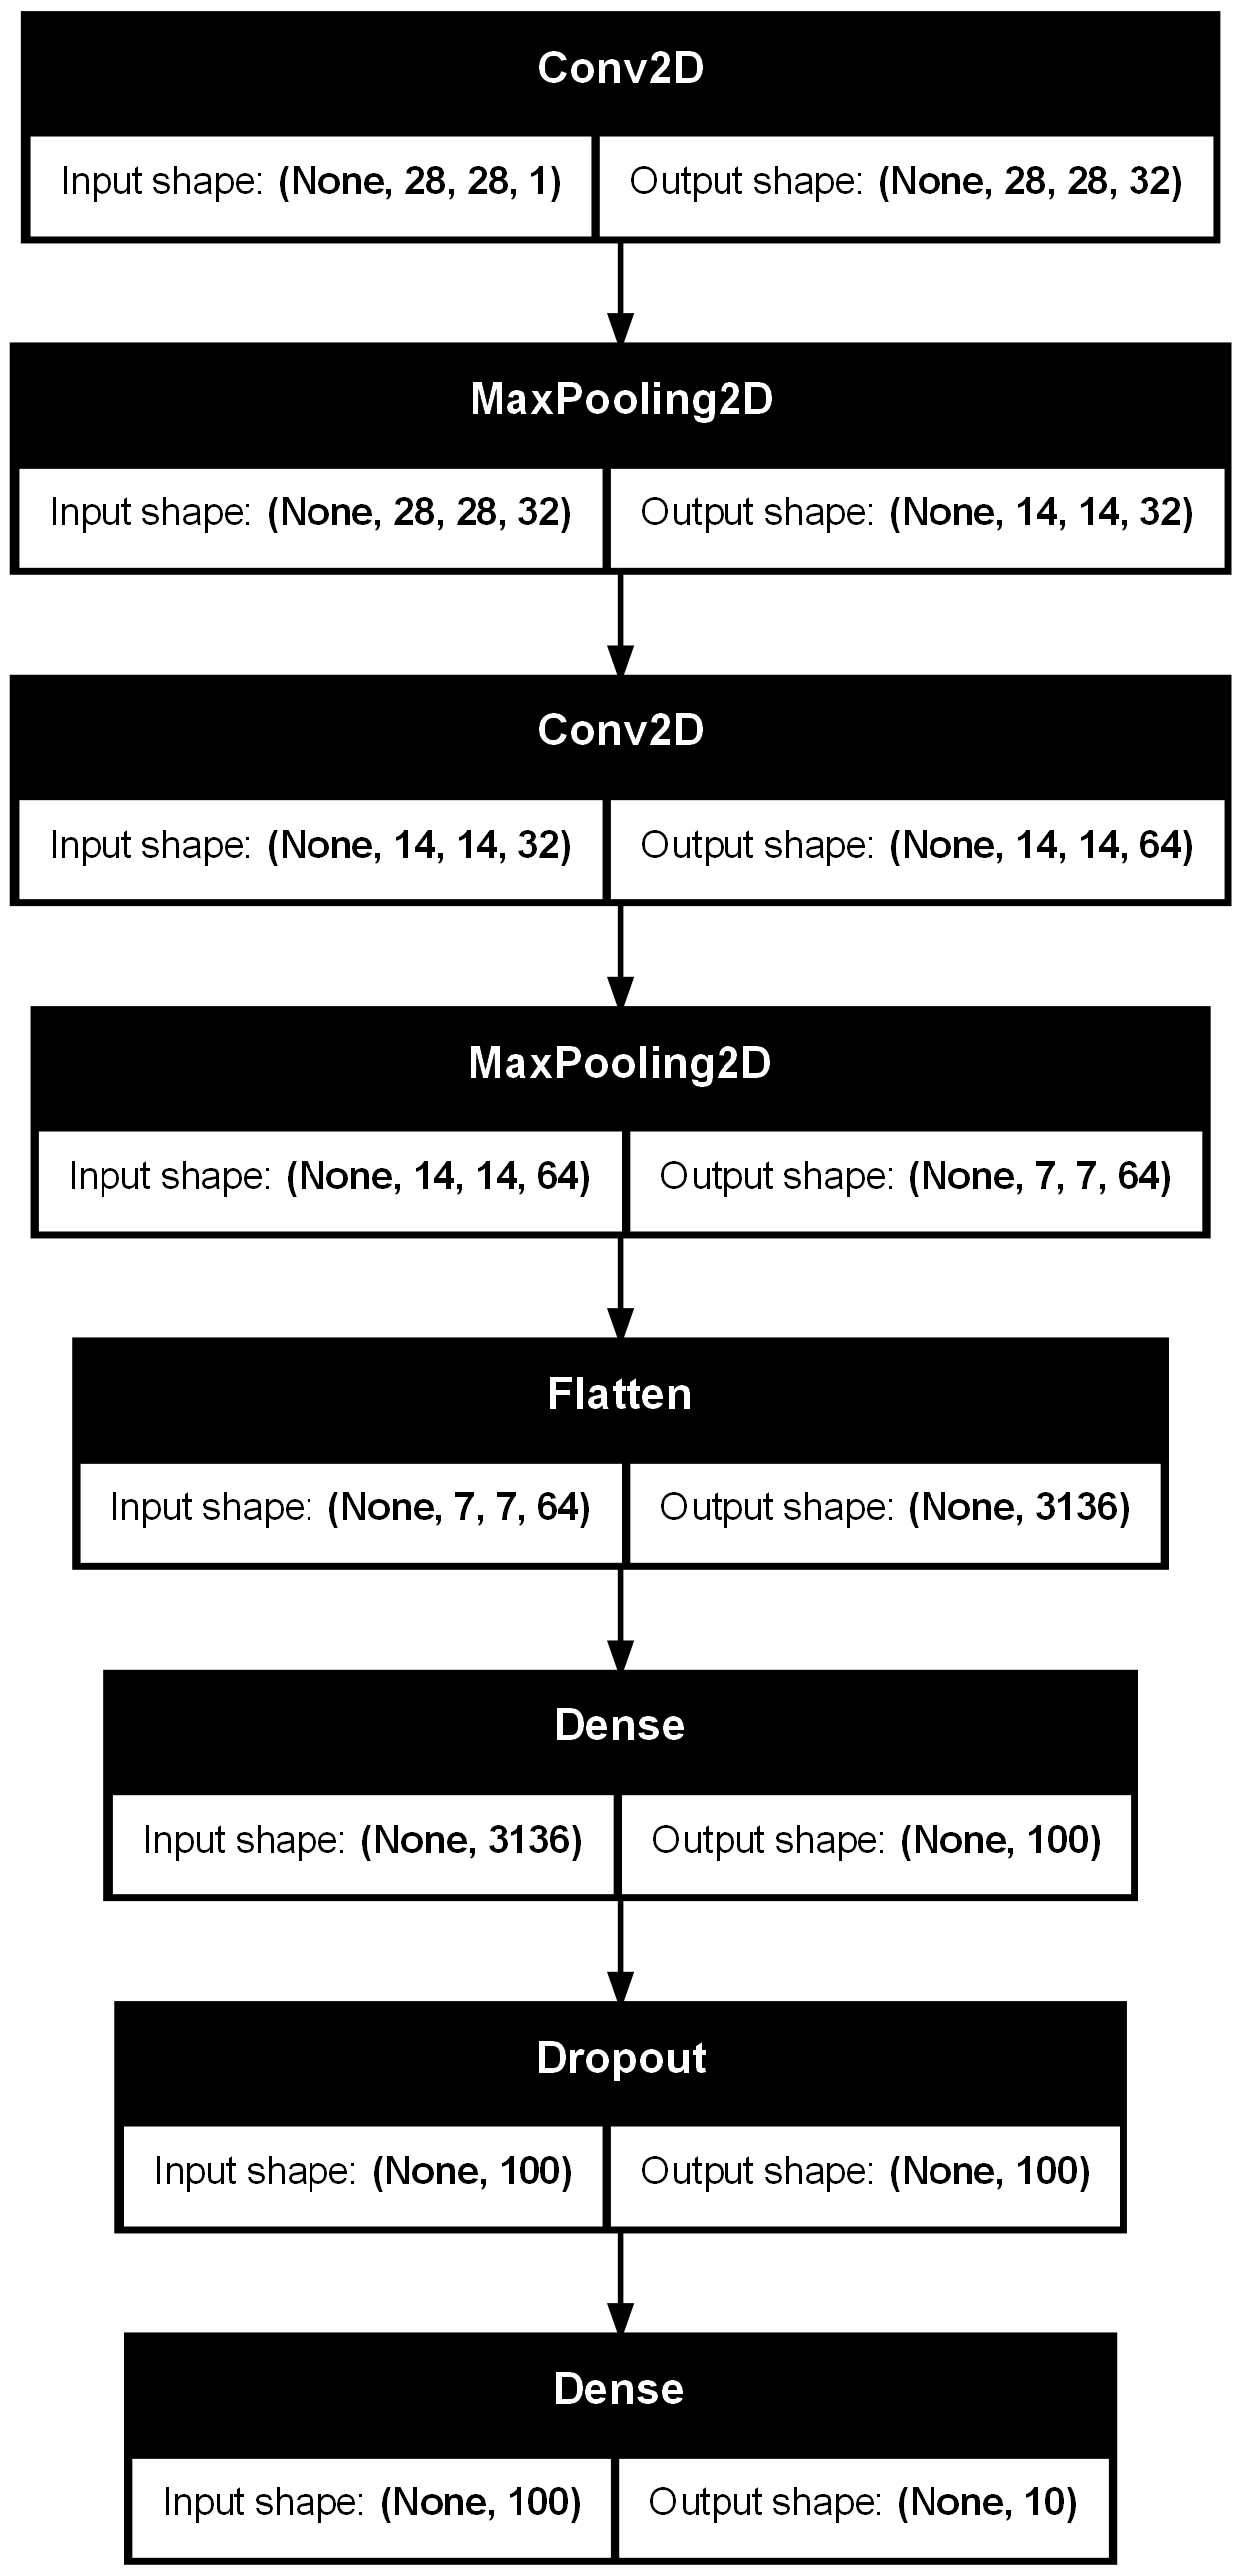

In [12]:
# Later 그리기
keras.utils.plot_model(model, show_shapes=True) # show_shaptes - 입출력 크기 표시

### (5) 모델 컴파일과 훈련

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7518 - loss: 0.6965 - val_accuracy: 0.8876 - val_loss: 0.3082
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8731 - loss: 0.3513 - val_accuracy: 0.8961 - val_loss: 0.2792
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8906 - loss: 0.3002 - val_accuracy: 0.9063 - val_loss: 0.2528
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9040 - loss: 0.2628 - val_accuracy: 0.9149 - val_loss: 0.2327
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9157 - loss: 0.2289 - val_accuracy: 0.9143 - val_loss: 0.2362
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9211 - loss: 0.2105 - val_accuracy: 0.9190 - val_loss: 0.2261
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9297 - loss: 0.1880 - val_accuracy: 0.9204 - val_loss: 0.2170
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9347 - loss: 0

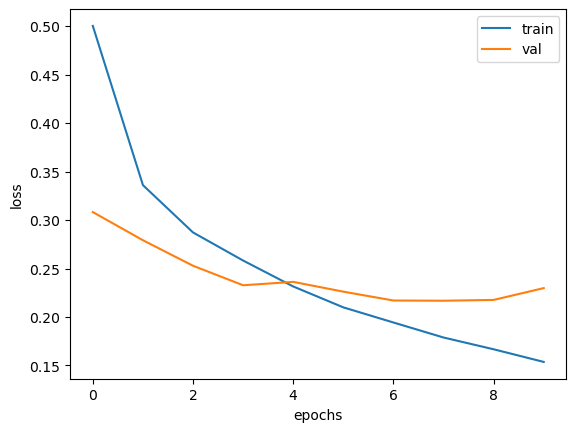

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

#### 검증 세트에 대한 손실이 점차 감소하다 정체되기 시작하고 훈련세트에 대한 손실은 더 낮아짐.
#### 9번째 에포크를 최적의 반복횟수로 생각할 수 있음.

In [15]:
# 검증 데이터로 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9225 - loss: 0.2127


[0.21678172051906586, 0.9210833311080933]

#### 검증 데이터에서 샘플 이미지 확인

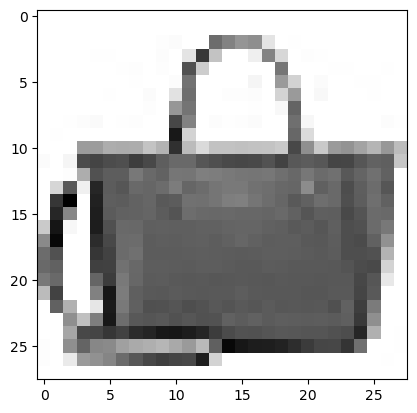

In [16]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
# predect() 함수를 이용하여 샘플 데이터 예측
# predict() 함수는 10개 클래스에 대한 예측확률을 결과로 출력
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[5.5900774e-15 2.4578500e-25 1.1599687e-20 1.3986838e-18 4.3426837e-19
  1.2927031e-18 1.1740065e-17 5.0917351e-19 1.0000000e+00 3.6016943e-19]]


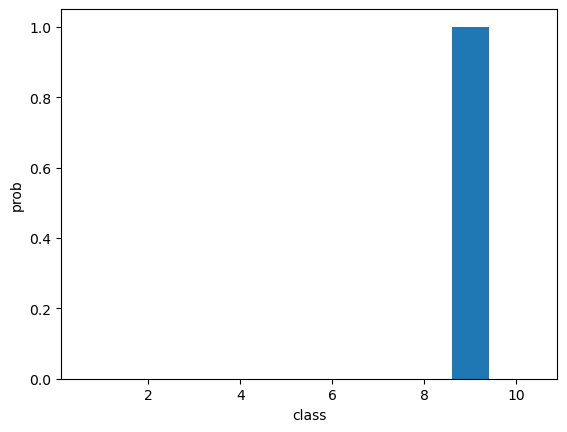

In [18]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [20]:
# 레이블을 리스트로 저장
classes = ['티셔츠', '바지', '스웨트', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵글부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


#### 샘플을 가방으로 예측함.

### (6) 테스트 세트의 성능확인

In [21]:
test_scaled = test_input.reshape(-1, 28, 28, 1) /255.0

In [22]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9107 - loss: 0.2535


[0.23681965470314026, 0.9143000245094299]

#### 아이템 분류시 91.4%의 성능을 기대함